# Data Reading

In [117]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Ashmi\Downloads\insurance.csv')

In [118]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [120]:
df.info()
# We can see that observation like age, bmi, children and charges are numeric, where as sex, smoker, region are factor features The total number of observation is - 1338 The data set has 7 features.
#We will predict the charges based on independent features after building the linear model.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [121]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory data analysis

In [122]:
# Exploratory Data Analysis (EDA) is performed to understand the distribution of variables and identify relationships. 
#Visualizations using libraries such as seaborn, matplotlib, and plotly are used to create various plots and graphs.

In [123]:

DF1 = df[['age', 'bmi', 'children','charges']]
cor = DF1.corr()
cor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


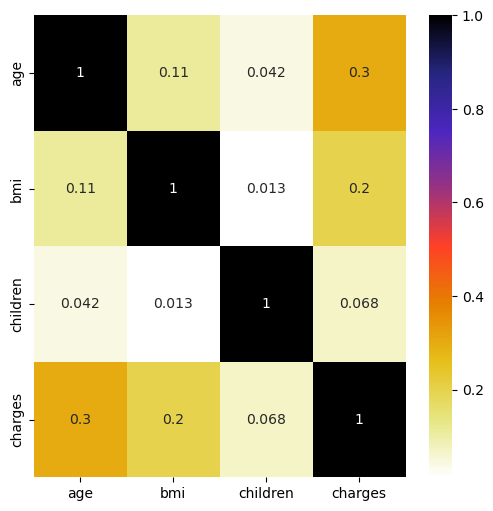

In [124]:

plt.figure(figsize=(6,6))
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

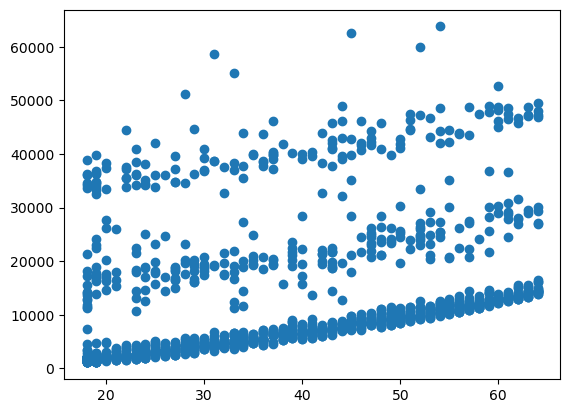

In [125]:
plt.scatter(df['age'], df['charges']);

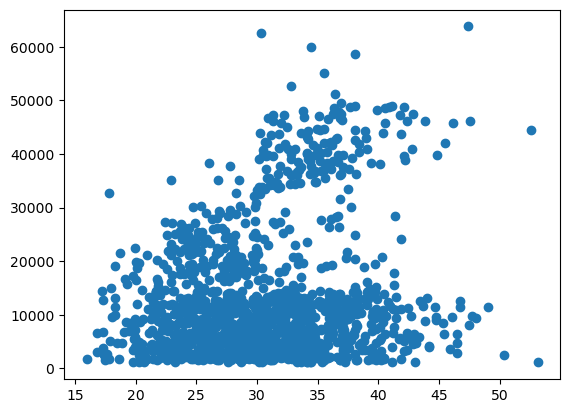

In [126]:
plt.scatter(df['bmi'], df['charges']);

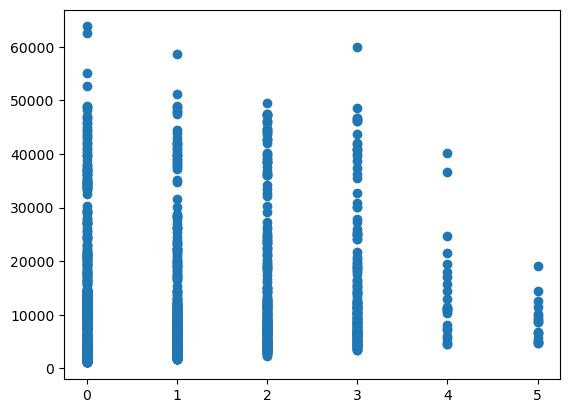

In [127]:
plt.scatter(df['children'], df['charges']);

<Axes: >

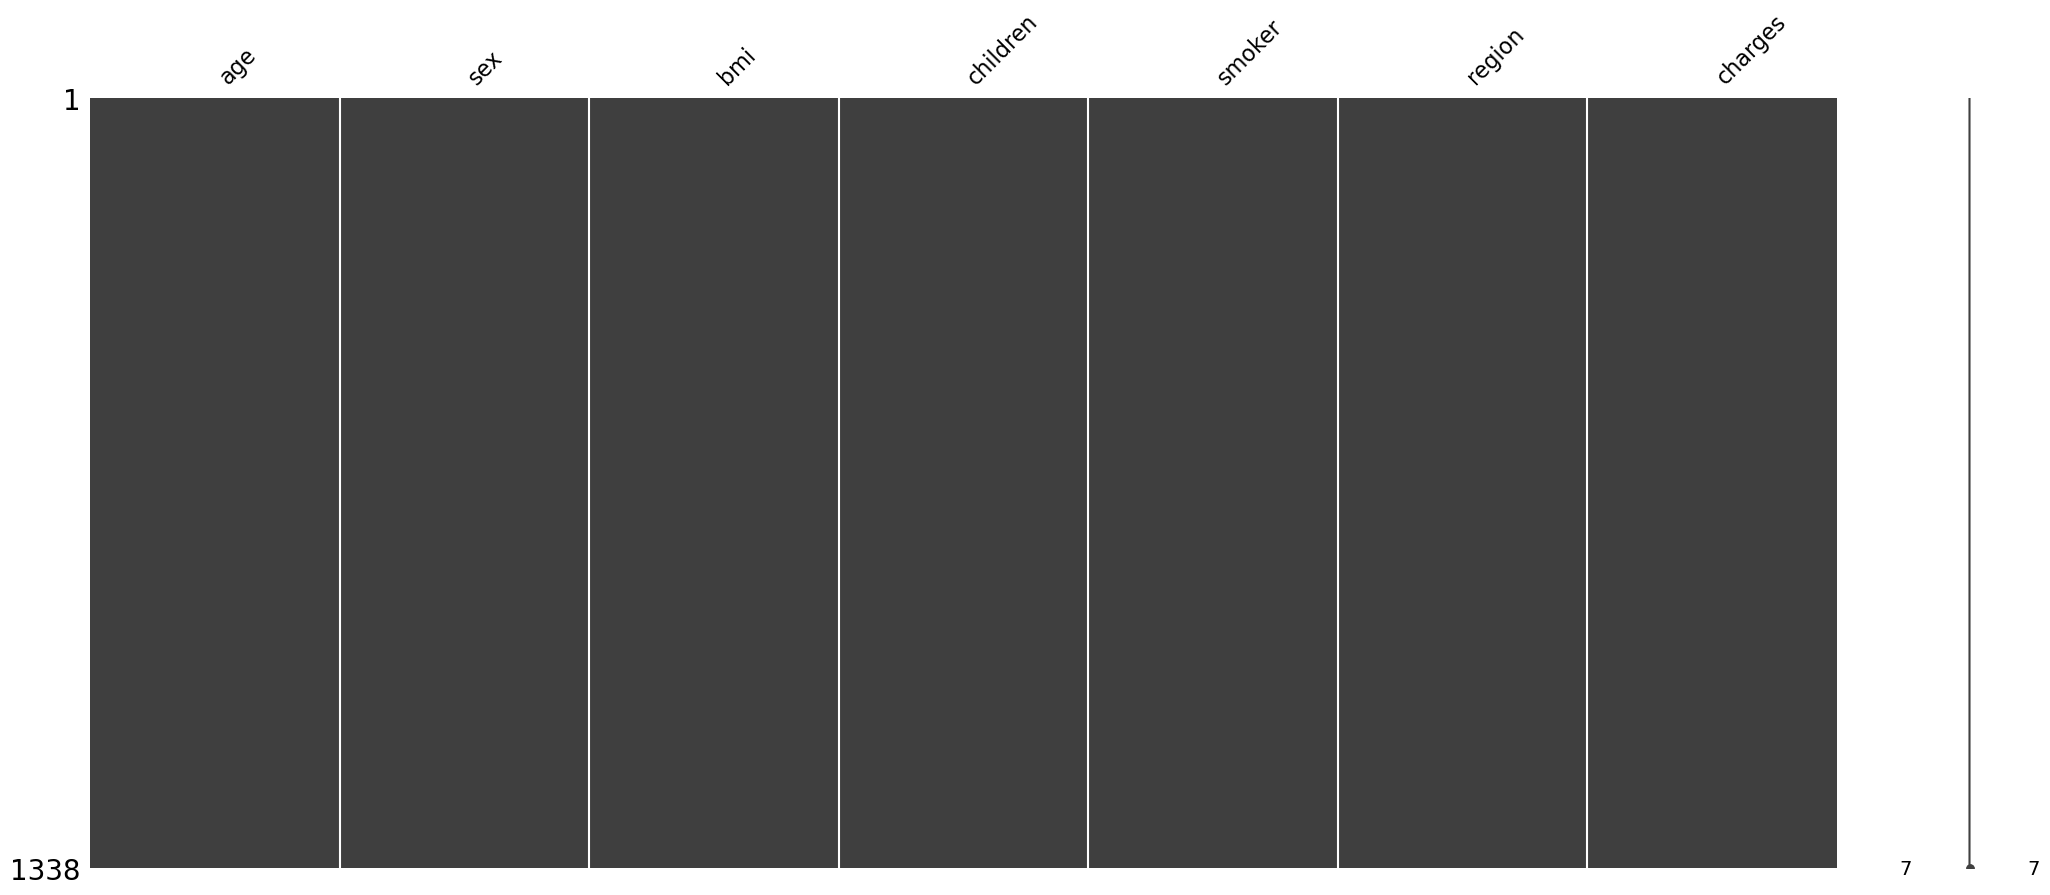

In [128]:
import missingno as msno
import pandas as pd

# Assuming 'df' is your DataFrame
msno.matrix(df)

In [129]:
# We can see that there are no missing values in any features, hence no data missing steps required for this source data set.

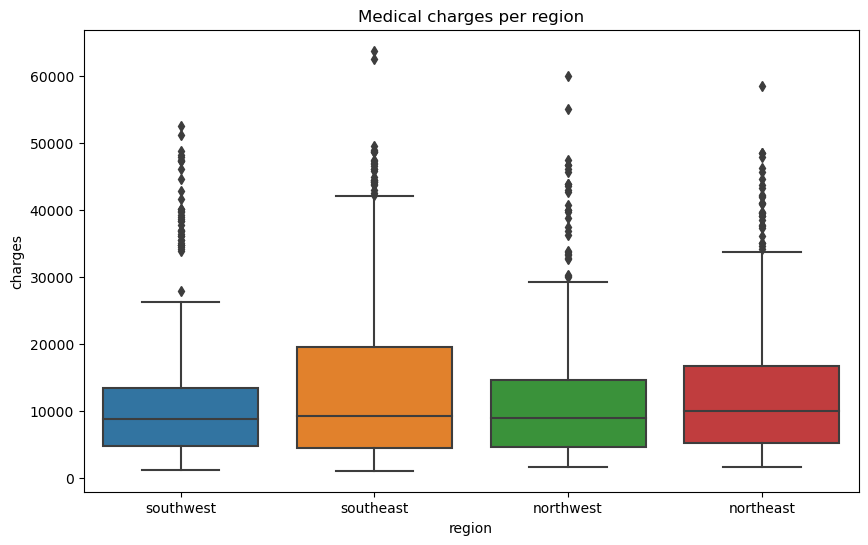

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'insurance' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Medical charges per region')
plt.show()


In [131]:
# The medical cost is almost same of all the region.

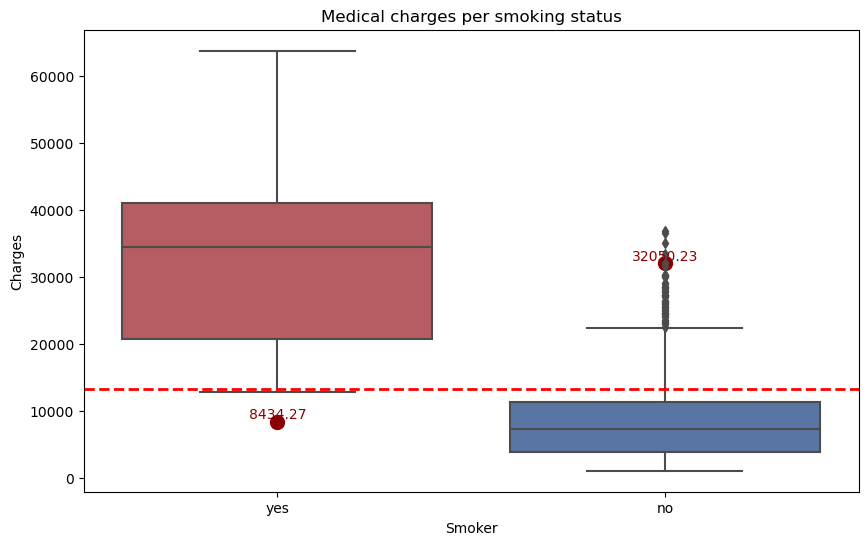

In [132]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the boxplot
ax = sns.boxplot(data=df, x='smoker', y='charges', palette=['#C44E52', '#4C72B0'])

# Calculate means and overall mean
group_means = df.groupby('smoker')['charges'].mean().reset_index()
overall_mean = df['charges'].mean()

# Add points for the mean of each group
for index, row in group_means.iterrows():
    ax.scatter(x=index, y=row['charges'], color='darkred', s=100)

# Add mean labels
for index, row in group_means.iterrows():
    plt.text(x=index, y=row['charges'], s=f'{row["charges"]:.2f}', color='darkred', va='bottom', ha='center')

# Add a horizontal line for the overall mean
plt.axhline(y=overall_mean, color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Medical charges per smoking status')
plt.xlabel('Smoker')
plt.ylabel('Charges')

# Show the plot
plt.show()


In [133]:
# The mean value charges are very high for smoker as compared to non smoker, charges is almost 4time than that of non smoker. The mean charges are 13,270 USD

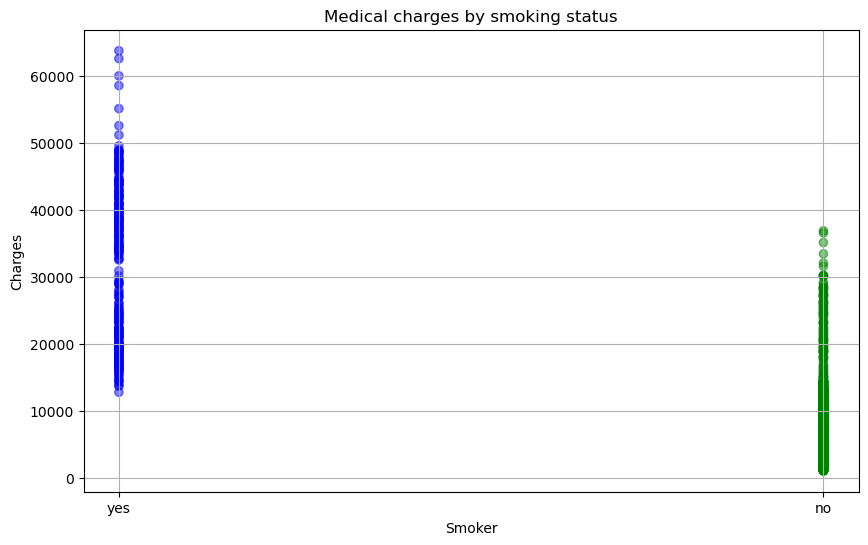

In [134]:

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot
# Assuming 'smoker' is a binary or categorical variable coded as 0 or 1, or 'yes'/'no'
categories = df['smoker'].unique()
colors = ['blue' if x == 'yes' else 'green' for x in df['smoker']]
plt.scatter(df['smoker'], df['charges'], c=colors, alpha=0.5)

# Add titles and labels
plt.title('Medical charges by smoking status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.grid(True)

# Show the plot
plt.show()


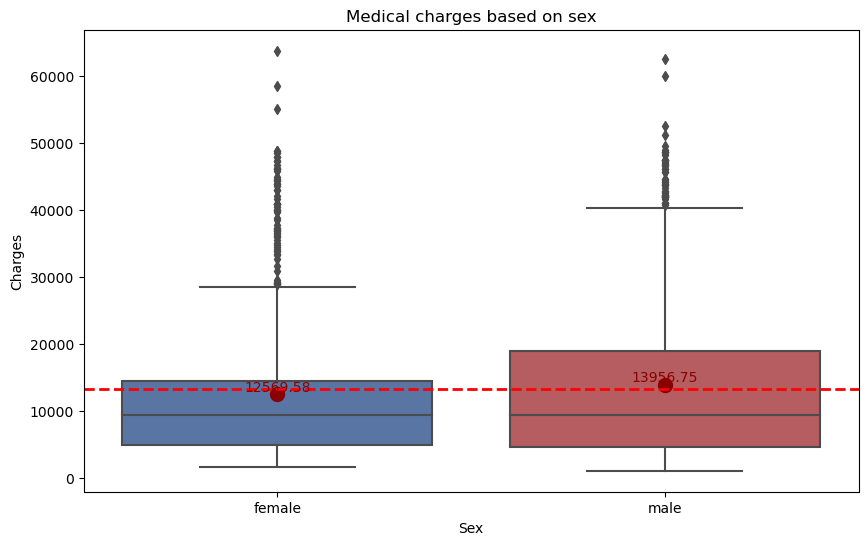

In [135]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the boxplot with sex as a category
ax = sns.boxplot(data=df, x='sex', y='charges', palette=['#4C72B0', '#C44E52'])

# Calculate means and overall mean
group_means = df.groupby('sex')['charges'].mean().reset_index()
overall_mean = df['charges'].mean()

# Add points for the mean of each group
for index, row in group_means.iterrows():
    ax.scatter(x=index, y=row['charges'], color='darkred', s=100)

# Add mean labels
for index, row in group_means.iterrows():
    plt.text(x=index, y=row['charges'], s=f'{row["charges"]:.2f}', color='darkred', va='bottom', ha='center')

# Add a horizontal line for the overall mean
plt.axhline(y=overall_mean, color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Medical charges based on sex')
plt.xlabel('Sex')
plt.ylabel('Charges')

# Show the plot
plt.show()

In [136]:
# The charges are almost same for male and female but are slightly higher for male, we will verify this during model building

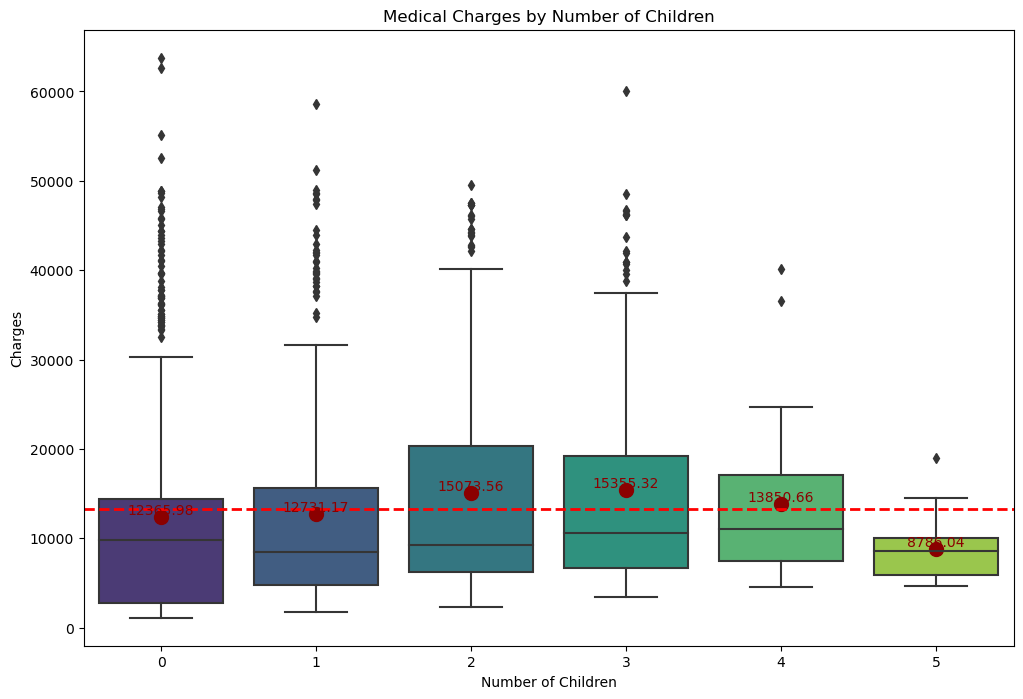

In [137]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Create the boxplot with children as a categorical variable
ax = sns.boxplot(data=df, x='children', y='charges', palette='viridis')

# Calculate means and overall mean
group_means = df.groupby('children')['charges'].mean().reset_index()
overall_mean = df['charges'].mean()

# Add points for the mean of each group
for index, row in group_means.iterrows():
    ax.scatter(x=index, y=row['charges'], color='darkred', s=100)

# Add mean labels
for index, row in group_means.iterrows():
    plt.text(x=index, y=row['charges'], s=f'{row["charges"]:.2f}', color='darkred', va='bottom', ha='center')

# Add a horizontal line for the overall mean
plt.axhline(y=overall_mean, color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Medical Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')

# Show the plot
plt.show()

In [138]:
# #The children count has no impact on charges but the family with 5 children as low average cost.

In [139]:
df['obesity'] = np.where(df['bmi'] > 30, 'yes', 'no')
df.head()

,age,sex,bmi,children,smoker,region,charges,obesity
0,19,female,27.900,0,yes,southwest,16884.92400,no
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,no


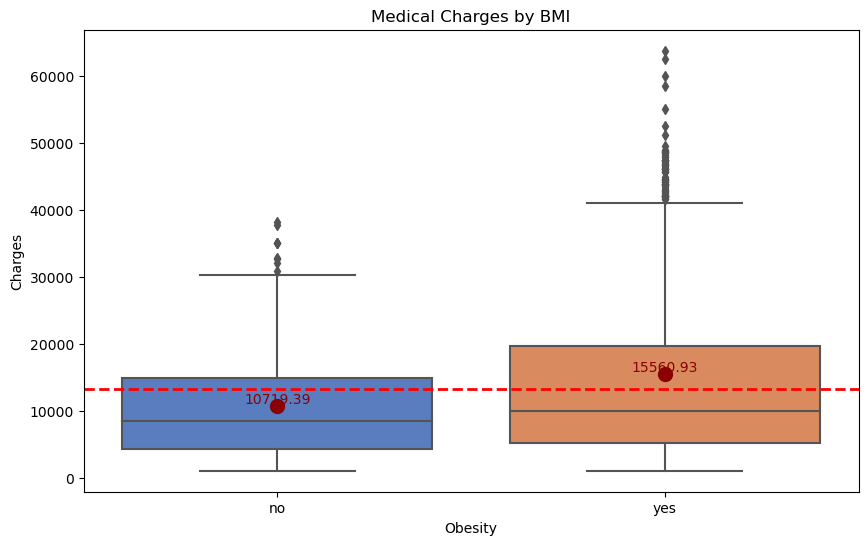

In [140]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the boxplot
ax = sns.boxplot(data=df, x='obesity', y='charges', palette='muted')

# Calculate means and overall mean
group_means = df.groupby('obesity')['charges'].mean().reset_index()
overall_mean = df['charges'].mean()

# Add points for the mean of each group
for index, row in group_means.iterrows():
    ax.scatter(x=index, y=row['charges'], color='darkred', s=100)  # s controls the size of the point

# Add mean labels
for index, row in group_means.iterrows():
    plt.text(x=index, y=row['charges'], s=f'{row["charges"]:.2f}', color='darkred', va='bottom', ha='center')

# Add a horizontal line for the overall mean
plt.axhline(y=overall_mean, color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Medical Charges by BMI')
plt.xlabel('Obesity')
plt.ylabel('Charges')

# Show the plot
plt.show()

In [141]:
#The obesity does not play any role in medical cost, but charges is almost 50% more for more obese individuals.

[]

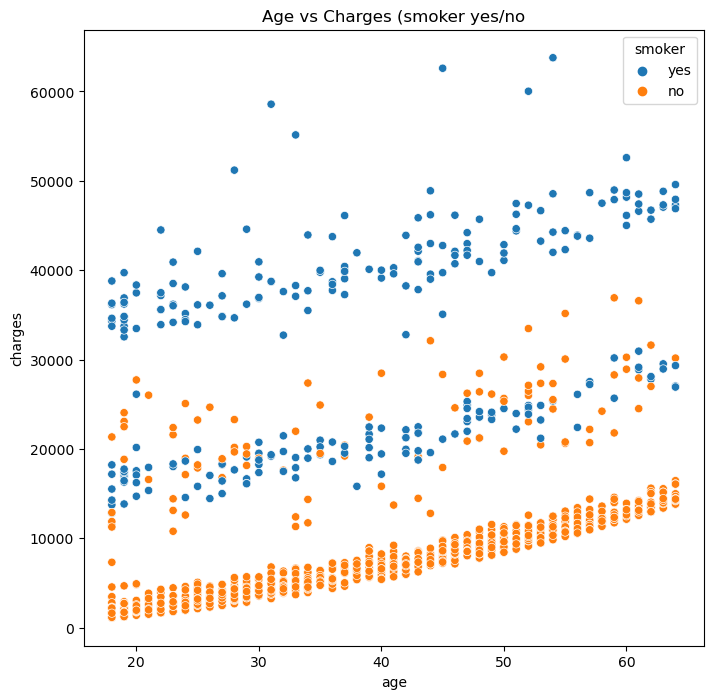

In [142]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges (smoker yes/no')
plt.plot()

In [143]:
# We can clearly see a distintion of charges vs age, for someone that doesn't smoke and someone that smokes

[]

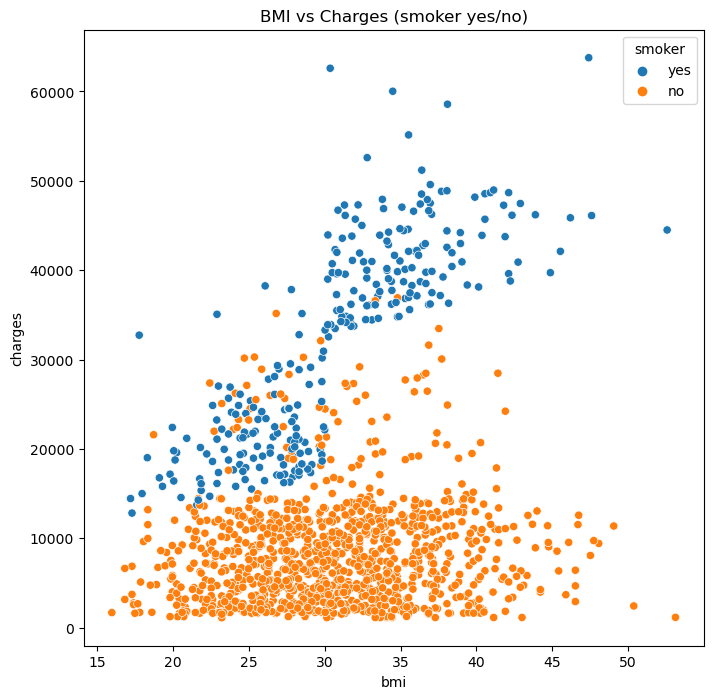

In [144]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges (smoker yes/no)')
plt.plot()

In [145]:
# From the graphic above we can conclude that a higher bmi doesn't mean a higher charges.Although again if a person smokes, there is a clear distinction

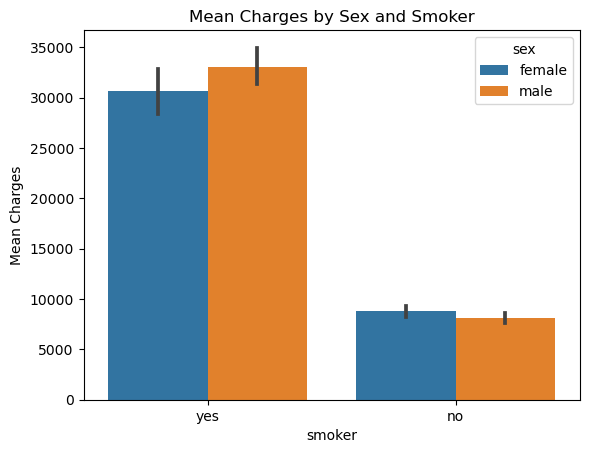

In [146]:
### Mean Charges by Sex and Smoker

sns.barplot(x='smoker', y='charges', hue='sex', data=df)

# Set the labels and title
plt.ylabel('Mean Charges')
plt.title('Mean Charges by Sex and Smoker')

# Show the plot
plt.show()

In [147]:
# From the above graph, we can see that most of the people who smoke are male, hence they have high charges. Therefore, our statement is true.

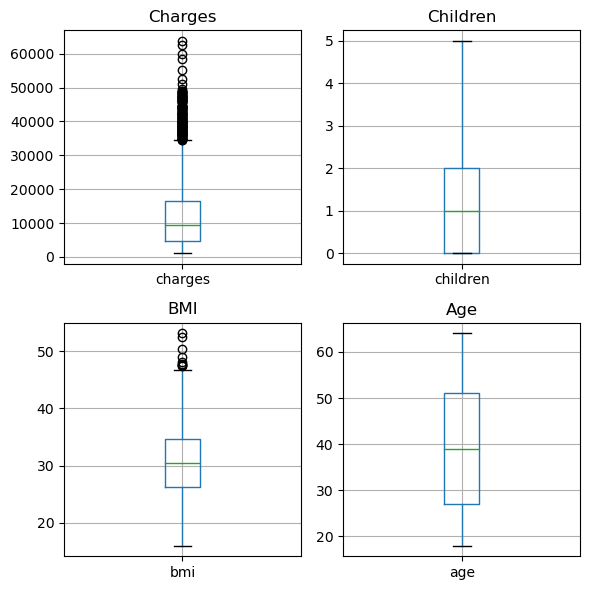

In [148]:
# Detection of outliers

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))  # Adjust size as needed

# Plot each variable on a separate subplot
df.boxplot(column=['charges'], ax=axes[0, 0])
axes[0, 0].set_title('Charges')

df.boxplot(column=['children'], ax=axes[0, 1])
axes[0, 1].set_title('Children')

df.boxplot(column=['bmi'], ax=axes[1, 0])
axes[1, 0].set_title('BMI')

df.boxplot(column=['age'], ax=axes[1, 1])
axes[1, 1].set_title('Age')

# Fine-tuning to prevent overlap of subplots
plt.tight_layout()
plt.show()

In [149]:
# From the above boxplot, we can see that there are no outliers in the  age and children column.
# From the above graph, we can see that there are a few outliers in the column - bmi. We will focus on removing these outliers during the Data Preprocessing phase.

# Data Preprocessing

In [150]:
### Dropping the column - region

new_df = df.copy()
new_df.drop(['region'], axis = 1, inplace = True)
new_df.head()

,age,sex,bmi,children,smoker,charges,obesity
0,19,female,27.900,0,yes,16884.92400,no
1,18,male,33.770,1,no,1725.55230,yes
2,28,male,33.000,3,no,4449.46200,yes
3,33,male,22.705,0,no,21984.47061,no
4,32,male,28.880,0,no,3866.85520,no


In [151]:
### A function to normalize numerical columns

def normalize_columns(df, column):
    data = df[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    df[column] = new_data

num_columns = ['age', 'bmi', 'children']

for each_column in num_columns:
    normalize_columns(new_df, each_column)    

In [152]:
new_df

,age,sex,bmi,children,smoker,charges,obesity
0,0.021739,female,0.321227,0.0,yes,16884.92400,no
1,0.000000,male,0.479150,0.2,no,1725.55230,yes
2,0.217391,male,0.458434,0.6,no,4449.46200,yes
3,0.326087,male,0.181464,0.0,no,21984.47061,no
4,0.304348,male,0.347592,0.0,no,3866.85520,no
...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,10600.54830,yes
1334,0.000000,female,0.429379,0.0,no,2205.98080,yes
1335,0.000000,female,0.562012,0.0,no,1629.83350,yes
1336,0.065217,female,0.264730,0.0,no,2007.94500,no


In [153]:
# # Feature encoding is the process of turning categorical data in a dataset into numerical data.
#It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

#Here, we will use One Hot Encoding for the columns - sex, smoker

In [154]:
dataset = pd.get_dummies(data = new_df, columns = ['sex', 'smoker'])
dataset

,age,bmi,children,charges,obesity,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,16884.92400,no,True,False,False,True
1,0.000000,0.479150,0.2,1725.55230,yes,False,True,True,False
2,0.217391,0.458434,0.6,4449.46200,yes,False,True,True,False
3,0.326087,0.181464,0.0,21984.47061,no,False,True,True,False
4,0.304348,0.347592,0.0,3866.85520,no,False,True,True,False
...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,yes,False,True,True,False
1334,0.000000,0.429379,0.0,2205.98080,yes,True,False,True,False
1335,0.000000,0.562012,0.0,1629.83350,yes,True,False,True,False
1336,0.065217,0.264730,0.0,2007.94500,no,True,False,True,False


In [155]:
import pandas as pd
dataset_encoded = pd.get_dummies(data=new_df, columns=['sex', 'smoker'], dtype=int)

dataset_encoded.head()

,age,bmi,children,charges,obesity,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,16884.92400,no,1,0,0,1
1,0.000000,0.479150,0.2,1725.55230,yes,0,1,1,0
2,0.217391,0.458434,0.6,4449.46200,yes,0,1,1,0
3,0.326087,0.181464,0.0,21984.47061,no,0,1,1,0
4,0.304348,0.347592,0.0,3866.85520,no,0,1,1,0


In [156]:
encoded_dataset = dataset_encoded.copy()
encoded_dataset.drop(['obesity'], axis = 1, inplace = True)
encoded_dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,16884.92400,1,0,0,1
1,0.000000,0.479150,0.2,1725.55230,0,1,1,0
2,0.217391,0.458434,0.6,4449.46200,0,1,1,0
3,0.326087,0.181464,0.0,21984.47061,0,1,1,0
4,0.304348,0.347592,0.0,3866.85520,0,1,1,0


In [157]:
charges_column = encoded_dataset.pop('charges')

In [158]:
# Re-insert the 'charges' column at the end of the DataFrame
encoded_dataset['charges'] = charges_column

# Showing the updated DataFrame
encoded_dataset.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,charges
0,0.021739,0.321227,0.0,1,0,0,1,16884.92400
1,0.000000,0.479150,0.2,0,1,1,0,1725.55230
2,0.217391,0.458434,0.6,0,1,1,0,4449.46200
3,0.326087,0.181464,0.0,0,1,1,0,21984.47061
4,0.304348,0.347592,0.0,0,1,1,0,3866.85520


In [159]:
#correlation in numeric columns

num_dataset = encoded_dataset[['age', 'bmi', 'children']]
num_dataset

,age,bmi,children
0,0.021739,0.321227,0.0
1,0.000000,0.479150,0.2
2,0.217391,0.458434,0.6
3,0.326087,0.181464,0.0
4,0.304348,0.347592,0.0
...,...,...,...
1333,0.695652,0.403820,0.6
1334,0.000000,0.429379,0.0
1335,0.000000,0.562012,0.0
1336,0.065217,0.264730,0.0


Text(0.5, 1.0, 'Correlation Heatmap')

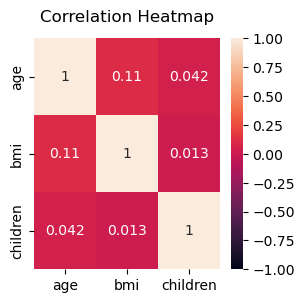

In [160]:
plt.figure(figsize = (3, 3))
heatmap = sns.heatmap(num_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

In [161]:
# From the above correlation matrix, we can see that there are a no strong correlations between the data. 
#We will use VIF to check for multi collinearity.

In [162]:
import statsmodels.api as sm
column_names = list(num_dataset.columns)

for name in column_names:
    if len(column_names) >= 2:
        Y = num_dataset.loc[:, num_dataset.columns == name]
        X = num_dataset.loc[:, num_dataset.columns != name]
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y, X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1 - r_squared), 2)
        print("Column: {} and VIF: {}".format(name, vif_value))
        
        if vif_value > 10:
            num_dataset = num_dataset.drop([name], axis = 1)
            column_names.remove(name)

Column: age and VIF: 1.01
Column: bmi and VIF: 1.01
Column: children and VIF: 1.0


In [163]:
# From the above data, we can see that there are no columns that cause multicollinearity.

# Modelling

In [164]:
### Splitting the dataset to the matrices X and Y
 
X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [165]:
X

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , ..., 1.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [166]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [167]:
from sklearn.model_selection import train_test_split
### Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

In [168]:
import statsmodels.api as sm #WE GET THE STATISTICAL MODEL
#add constant to predictor variables
x2 = sm.add_constant(X_train)
#fit linear regression model
model = sm.OLS(Y_train, x2).fit()

In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     654.3
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.59e-321
Time:                        14:08:32   Log-Likelihood:                -10826.
No. Observations:                1070   AIC:                         2.166e+04
Df Residuals:                    1064   BIC:                         2.169e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4938.2135    281.196     17.561      0.000    4386.453    5489.974
x1          1.149e+04    613.842     18.721      0.000    1.03e+04    1.27e+04
x2          1.189e+04   1108.713     10.725      0.000    9715.493    1.41e+04
x3          1877.0373    770.500      2.436      0.015     365.164    3388.910
x4          2582.6509    230.781     11.191      0.000    2129.813    3035.489
x5          2355.5626    233.593     10.084      0.000    1897.207    2813.918
x6         -9520.3104    238.182    -39.971      0.000   -9987.670   -9052.951
x7          1.446e+04    293.885     49.198      0.000    1.39e+04     1.5e+04
==============================================================================
Omnibus:                      235.720   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.369
Skew:                           1.170   Prob(JB):                    6.97e-126
Kurtosis:                       5.731   Cond. No.                     2.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.74e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Applying Multi linear regression

In [170]:
from sklearn.linear_model import LinearRegression
### Training the Multi Linear Regression model on the Training set

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [171]:
print('Intercept', linear_regressor.intercept_)
print('Coefficient', linear_regressor.coef_)
print('Score', linear_regressor.score(X_test, Y_test))

Intercept -6.290374788602825e+17
Coefficient [1.14916426e+04 1.05230468e+04 3.84485603e+03 6.23931278e+17
 6.23931278e+17 5.10620074e+15 5.10620074e+15]
Score 0.7295977582142821


In [172]:
### Predicting the Test set results

Y_pred1 = linear_regressor.predict(X_test)

In [173]:
from math import sqrt
mse = round(mean_squared_error(Y_test, Y_pred1), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred1), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6308.914
R-squared value of the model is : 0.73


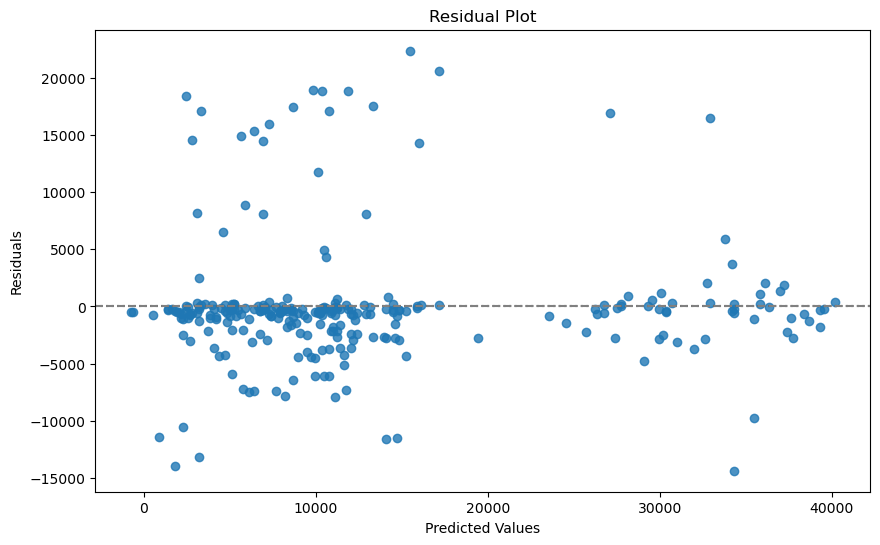

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Plotting the residuals without the lowess smoothing line
plt.figure(figsize=(10, 6))
sns.residplot(x=Y_pred1, y=residuals, lowess=False)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()


C:\Users\Ashmi\AppData\Local\Temp\ipykernel_18984\969463647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
C:\Users\Ashmi\AppData\Local\Temp\ipykernel_18984\969463647.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

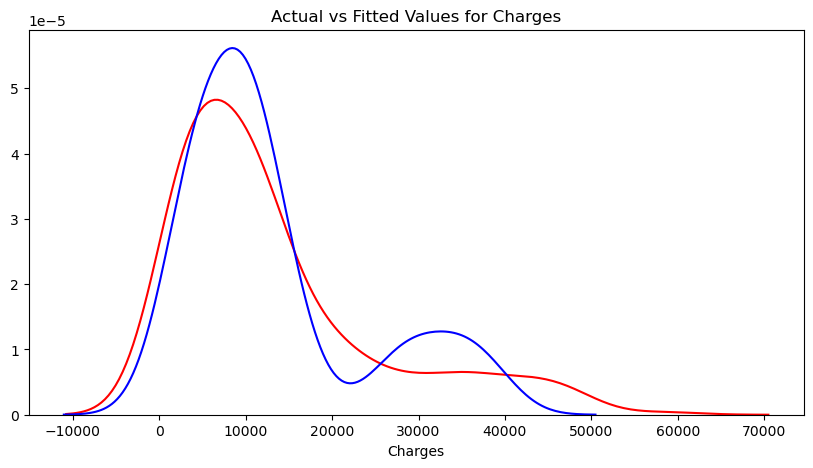

In [175]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [176]:
predicted1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred1})
predicted1.head()

,Actual,Predicted
0,12950.07120,14848.0
1,36910.60803,15488.0
2,3857.75925,5120.0
3,2855.43755,4736.0
4,6799.45800,8320.0


# Lasso Regression Model

In [177]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [178]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=101) #we’ll use the RepeatedKF
#define model
lasso_model = LassoCV(alphas=(0.1, 1.0, 10.0), cv=cv, n_jobs=-1)
#fit model
lasso_model.fit(X_train, Y_train)

LassoCV(alphas=(0.1, 1.0, 10.0),
        cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        n_jobs=-1)

In [179]:
print('Intercept', lasso_model.intercept_)
print('Coefficient', lasso_model.coef_)
print('Score', lasso_model.score(X_test, Y_test))

Intercept 21754.12993328362
Coefficient [ 1.14908571e+04  1.18875634e+04  1.87535942e+03  2.26588409e+02
 -6.33301626e-14 -2.39781873e+04  2.23357510e-11]
Score 0.7290669330947697


In [180]:
#WE PREDICT OUR LASSOCV REGRESSION MODEL
Y_pred4 = lasso_model.predict(X_test)

In [181]:
from sklearn import metrics

# Assuming y_test and y_pred4 are defined
# Compute mean absolute error
mae = metrics.mean_absolute_error(Y_test, Y_pred4)
print('Mean Absolute Error:', mae)

# Compute mean square error
mse = metrics.mean_squared_error(Y_test, Y_pred4)
print('Mean Square Error:', mse)

# Compute root mean square error
rmse = np.sqrt(mse)
print('Root Mean Square Error:', rmse)

# Compute R-squared value
r_squared = metrics.r2_score(Y_test, Y_pred4)
print('R-squared:', r_squared)

Mean Absolute Error: 4273.380114431033
Mean Square Error: 39880526.58288969
Root Mean Square Error: 6315.103054019759
R-squared: 0.7290669330947697


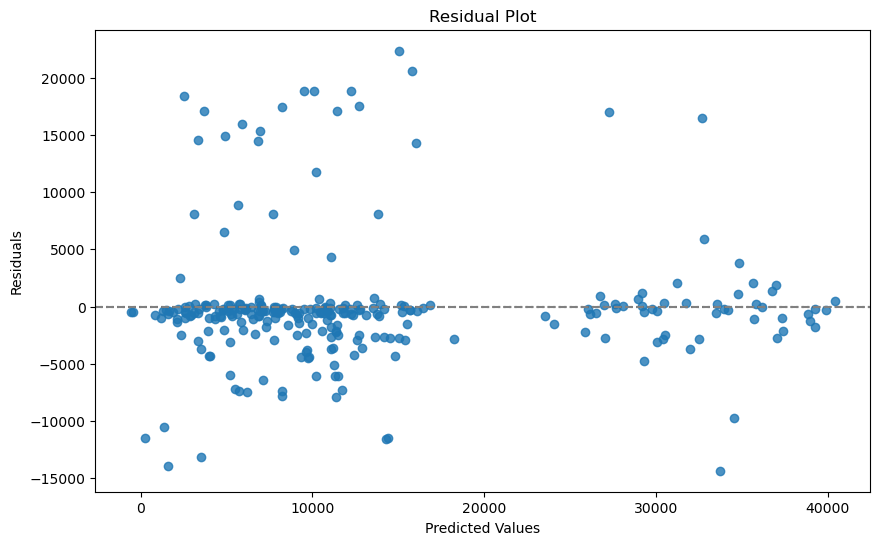

In [182]:
# Plotting the residuals without the lowess smoothing line
plt.figure(figsize=(10, 6))
sns.residplot(x=Y_pred4, y=residuals, lowess=False)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()


C:\Users\Ashmi\AppData\Local\Temp\ipykernel_18984\1076550126.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
C:\Users\Ashmi\AppData\Local\Temp\ipykernel_18984\1076550126.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

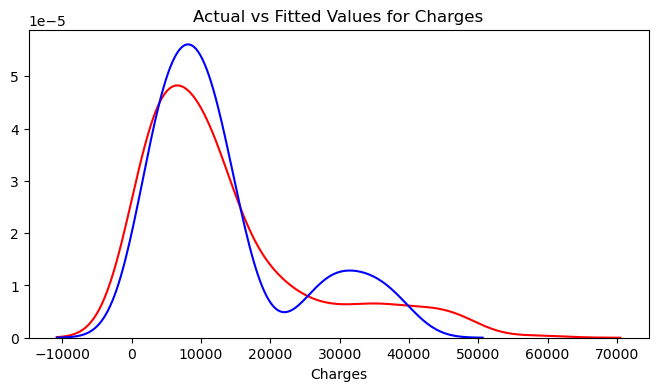

In [183]:
# Visualising the Lasso Regression results
plt.figure(figsize=(8, 4))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [184]:
predicted4 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred4})
predicted4.head()

,Actual,Predicted
0,12950.07120,15687.672321
1,36910.60803,15019.860477
2,3857.75925,5793.415448
3,2855.43755,5061.340866
4,6799.45800,6909.211701


# Random Forest Regressor

In [185]:
from sklearn.ensemble import RandomForestRegressor
Ram_reg = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_split=2)
# fit the regressor model
Ram_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [186]:
print(Ram_reg.score(X_test, Y_test))

0.7935668781588054


In [187]:
Y_pred2 = Ram_reg.predict(X_test)

In [188]:
from sklearn import metrics

# Assuming y_test and y_pred6 are defined
# Compute mean absolute error
mae = metrics.mean_absolute_error(Y_test, Y_pred2)
print('Mean Absolute Error:', mae)

# Compute mean square error
mse = metrics.mean_squared_error(Y_test, Y_pred2)
print('Mean Square Error:', mse)

# Compute root mean square error
rmse = np.sqrt(mse)
print('Root Mean Square Error:', rmse)

# Compute R-squared value
r_squared = metrics.r2_score(Y_test, Y_pred2)
print('R-squared:', r_squared)

Mean Absolute Error: 2944.9904312204794
Mean Square Error: 30386330.089624573
Root Mean Square Error: 5512.379712032233
R-squared: 0.7935668781588054


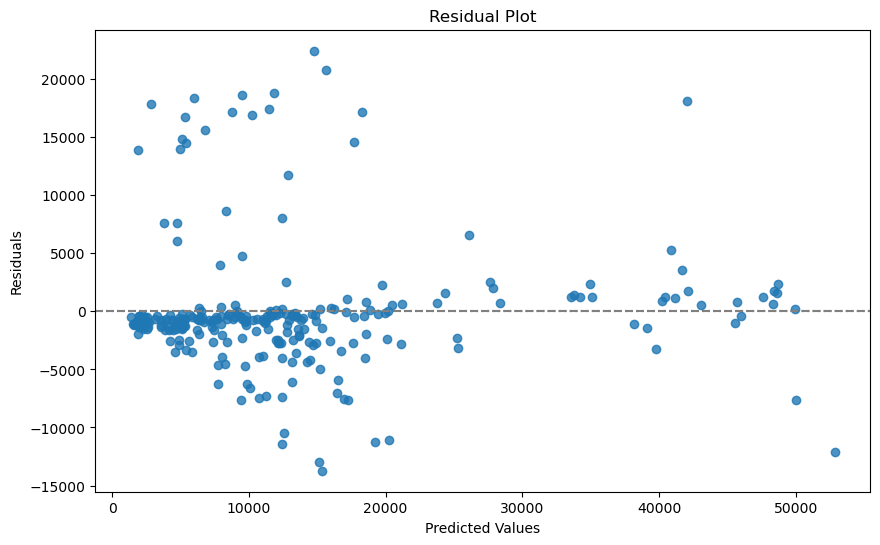

In [189]:


# Plotting the residuals without the lowess smoothing line
plt.figure(figsize=(10, 6))
sns.residplot(x=Y_pred2, y=residuals, lowess=False)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()



C:\Users\Ashmi\AppData\Local\Temp\ipykernel_18984\700997200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
C:\Users\Ashmi\AppData\Local\Temp\ipykernel_18984\700997200.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

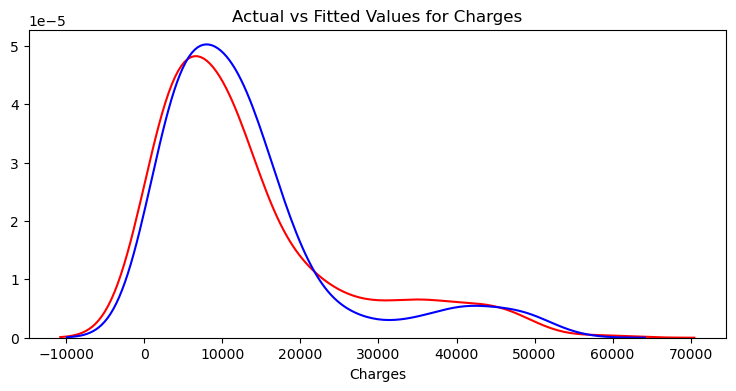

In [190]:
# Visualising the Random Forest Regressor results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

In [191]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted2 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred2})
predicted2.head()

,Actual,Predicted
0,12950.07120,13398.774886
1,36910.60803,14791.138659
2,3857.75925,3577.350552
3,2855.43755,3857.554179
4,6799.45800,6366.564182


In [192]:
# WE TRY SELECT THE BEST FEATURES USING FEATURE IMPORTANCE FROM RANDOM FOREST REGRESSOR

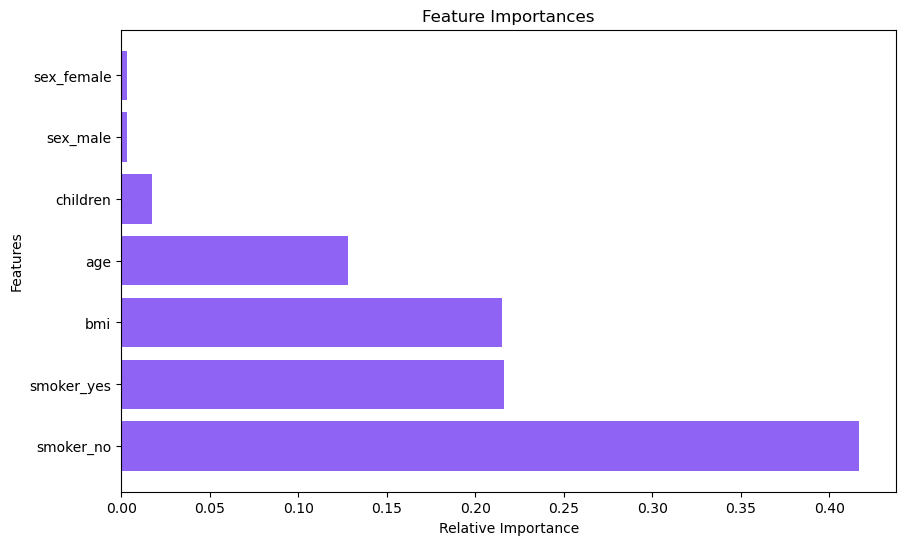

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X= encoded_dataset

# Assuming Ram_reg is your model
importances = Ram_reg.feature_importances_

# Get feature names and their corresponding importances
feature_importances = list(zip(X.columns, importances))

# Sort feature importances by importance score
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
features_sorted, importances_sorted = zip(*feature_importances)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.barh(range(len(features_sorted)), importances_sorted, color='#8f63f4', align='center')
plt.yticks(range(len(features_sorted)), features_sorted)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [194]:
# We can see that the smoker, bmi and age are more important features compared to the other features.

In [195]:
#We select the import features
x = encoded_dataset.drop(['charges','sex_female','sex_male'], axis = 1)
y = encoded_dataset['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [196]:
x

,age,bmi,children,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,0,1
1,0.000000,0.479150,0.2,1,0
2,0.217391,0.458434,0.6,1,0
3,0.326087,0.181464,0.0,1,0
4,0.304348,0.347592,0.0,1,0
...,...,...,...,...,...
1333,0.695652,0.403820,0.6,1,0
1334,0.000000,0.429379,0.0,1,0
1335,0.000000,0.562012,0.0,1,0
1336,0.065217,0.264730,0.0,1,0


# polynomial regression model

In [197]:
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree=2)

x_poly = poly_reg.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 0)

In [198]:
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

LinearRegression()

In [199]:
print(pol_reg.intercept_)
print(pol_reg.coef_)
print(pol_reg.score(x_test, y_test))

-529196109453252.8
[ 0.00000000e+00  5.80539778e+15  1.61777950e+15 -1.28189531e+16
  9.13685113e+14  1.50070327e+14  6.43859680e+03  3.15547505e+03
  1.38144445e+03 -5.80539778e+15 -5.80539778e+15 -1.29709195e+04
  7.06997059e+02 -1.61777950e+15 -1.61777950e+15 -3.65371647e+03
  1.28189531e+16  1.28189531e+16 -3.84489004e+14  0.00000000e+00
  3.79125782e+14]
0.8812811715933562


In [200]:
y_pred3 = pol_reg.predict(x_test)

In [201]:
from sklearn import metrics

# Assuming y_test and y_pred6 are defined
# Compute mean absolute error
mae = metrics.mean_absolute_error(y_test, y_pred3)
print('Mean Absolute Error:', mae)

# Compute mean square error
mse = metrics.mean_squared_error(y_test, y_pred3)
print('Mean Square Error:', mse)

# Compute root mean square error
rmse = np.sqrt(mse)
print('Root Mean Square Error:', rmse)

# Compute R-squared value
r_squared = metrics.r2_score(y_test, y_pred3)
print('R-squared:', r_squared)

Mean Absolute Error: 2820.5476068246267
Mean Square Error: 18891722.691276126
Root Mean Square Error: 4346.460938657579
R-squared: 0.8812811715933562


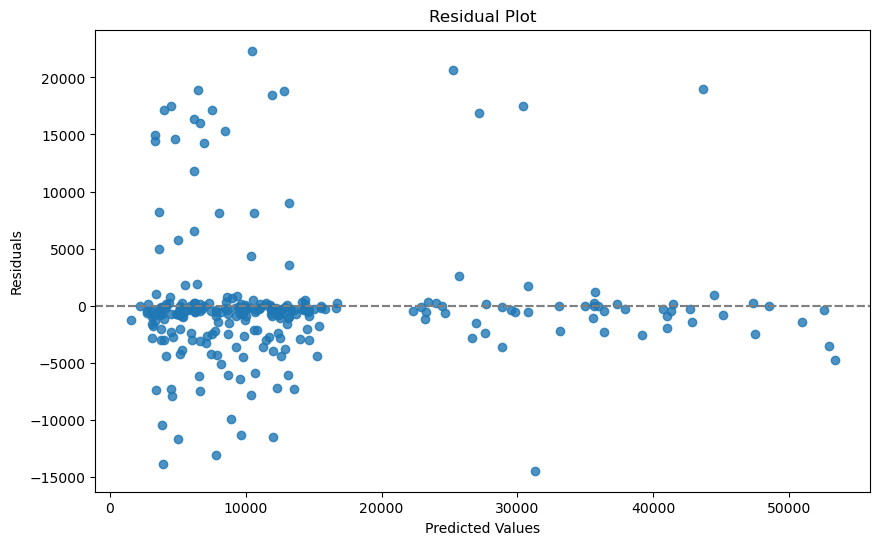

In [202]:

# Plotting the residuals without the lowess smoothing line
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred3, y=residuals, lowess=False)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

C:\Users\Ashmi\AppData\Local\Temp\ipykernel_18984\586525340.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Ashmi\AppData\Local\Temp\ipykernel_18984\586525340.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

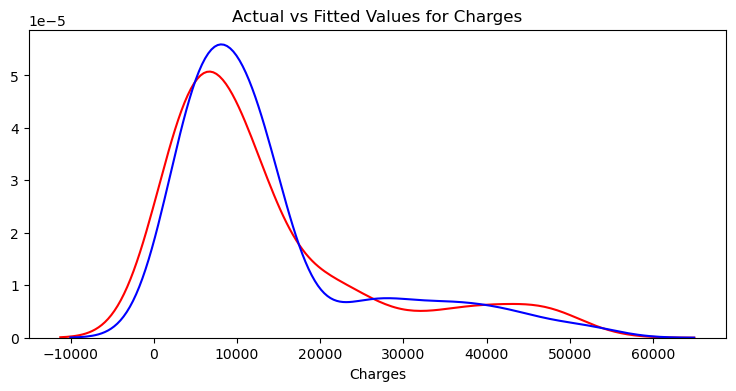

In [203]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(9, 4))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')

plt.show()
plt.close()

In [204]:
# From the model evaluation score, we can see that polynomial regression and the Random Forest Regressor are performing well than the other models.